# Correlations Between Securities

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
stocks = 'FB AMZN NFLX GOOG GLD'.split()
data = pdr.get_data_yahoo(stocks, '2014-01-01')['Close']
data = data.resample('BM').last()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2014-01-31 to 2019-01-31
Freq: BM
Data columns (total 5 columns):
AMZN    61 non-null float64
FB      61 non-null float64
GLD     61 non-null float64
GOOG    61 non-null float64
NFLX    61 non-null float64
dtypes: float64(5)
memory usage: 2.9 KB


In [9]:
data = data[:60]
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2014-01-31 to 2018-12-31
Freq: BM
Data columns (total 5 columns):
AMZN    60 non-null float64
FB      60 non-null float64
GLD     60 non-null float64
GOOG    60 non-null float64
NFLX    60 non-null float64
dtypes: float64(5)
memory usage: 2.8 KB


In [11]:
change = pd.DataFrame()
for month in data:
    if month not in change:
        change[month] = np.log(data[month]).diff()
change.head()  

,AMZN,FB,GLD,GOOG,NFLX
Date,,,,,
2014-01-31,NaN,NaN,NaN,NaN,NaN
2014-02-28,0.009462,0.089964,0.060816,0.028943,0.084967
2014-03-31,-0.073709,-0.127913,-0.031926,-0.086376,-0.235773
2014-04-30,-0.100756,-0.007665,0.004923,-0.055956,-0.089041
2014-05-30,0.027309,0.057214,-0.030986,0.061185,0.260399


In [12]:
change.corr()

,AMZN,FB,GLD,GOOG,NFLX
AMZN,1.000000,0.429630,-0.066129,0.675569,0.593632
FB,0.429630,1.000000,0.050438,0.553947,0.389302
GLD,-0.066129,0.050438,1.000000,-0.179406,-0.049193
GOOG,0.675569,0.553947,-0.179406,1.000000,0.521731
NFLX,0.593632,0.389302,-0.049193,0.521731,1.000000


In [14]:
corr = change.corr()
corr['FB'].sort_values(ascending=False)

FB      1.000000
GOOG    0.553947
AMZN    0.429630
NFLX    0.389302
GLD     0.050438
Name: FB, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1221cdf60>,
      dtype=object)

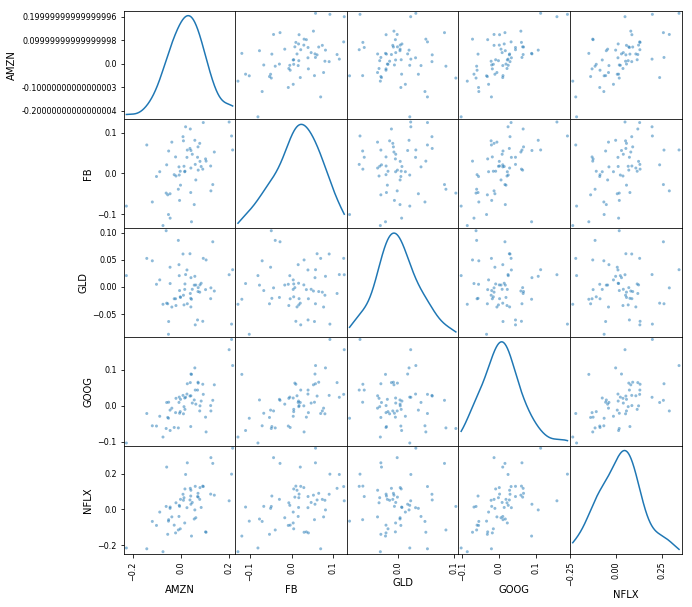

In [15]:
pd.plotting.scatter_matrix(change, diagonal='kde', figsize=(10,10))